<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h1>Aprendizaje No Supervisado</h1>
<h2>Práctico 1 - Clustering</h2>
<hr>
Por David Gonzalez <leonardo.david.gonzalez@gmail.com> y Facundo Díaz Cobos <facundo.diaz.cobos@gmail.com>
</center>
<br/>

## Objetivos
En este práctico se explorarán diferentes soluciones de clustering, para desarrollar las capacidades de análisis de
soluciones de clustering. Es preferible que los conjuntos de datos con los que trabajar sean propios, ya que de esta
forma podrán aplicar su conocimiento del dominio en la interpretación de las diferentes soluciones. Alternativa-
mente, pueden usar conjuntos de datos de los ejemplos de la materia.
En los mismos, hacer una breve discusión del problema y explicar cómo puede ser útil usar técnicas de clustering.

# Consignas
Para cumplir los objetivos, realizar las siguientes actividades:

1 - Explorar soluciones con diferentes parámetros y compararlas. Por ejemplo, variar el número de clusters, las
métricas de distancia, el número de iteraciones o el número de veces que se inicializan las semillas. Describir
brevemente: número de clusters, población de cada cluster, algunas caracterı́sticas distintivas de cada cluster,
algunos elementos que se puedan encontrar en cada cluster.

2 - Incorporar un embedding como preproceso a los datos, aplicar los algoritmos de clustering después de ese
preproceso y describir la solución o soluciones resultantes, discutiendo las ventajas que resultan. Se pueden
usar:

◦ Principal
Component Analysis http://scikit-learn.org/stable/modules/generated/sklearn.
decomposition.PCA.html

◦ para texto, embeddings neuronales Gensim https://pypi.org/project/gensim/

◦ para texto, embeddings neuronales Fastext https://pypi.org/project/fasttext/

3 - Proponer (y en lo posible, implementar) métricas de evaluación de soluciones de clustering basadas en testigos.
Los testigos son pares de objetos que un experto de dominio etiqueta como “deberı́an estar en el mismo cluster”
o “deberı́an estar en distintos clusters”.

4 - El método k-means de scikit-learn no provee una forma sencilla de obtneer los objetos más cercanos al centroide
de un cluster. Proponga alguna forma de obtener una muestra de los elementos de un cluster que sean cercanos
al centroide, por ejemplo, usando clasificadores, usando distancia coseno, etc. En lo posible, implementarlos y
mostrar esos elementos, discutir la representatividad de los elementos encontrados.

# <u>RESOLUCIÓN</u>

# Importando los datos:
Vamos a trabajar un set de datos correspondiente a compras reales de clientes realizadas en el año 2017. Los clientes fueron anonimizados previamente para poder ser utilizados en el ejercicio.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from yellowbrick.cluster.elbow import KElbowVisualizer
from sklearn.cluster import KMeans
from datetime import datetime

import numpy as np
np.random.seed(0)

# Configuramos el tamaño de los gráficos, en pulgadas
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

In [2]:
from util import check_dataset
check_dataset()

* Chequeando dataset de trabajo...
- Dataset OK.


In [3]:
from util import load_dataset
ventas_df = load_dataset()

* Importando dataset...
 - 1677680 registros importados.


# 1 - Explorar soluciones con diferentes parámetros y compararlas:

In [4]:
from IPython.display import display, HTML

In [5]:
display(HTML('<b>* Cantidad de Features: {0}</b>'.format(len(ventas_df.columns))))
display(ventas_df.columns)
display(ventas_df.head())

Index(['Unnamed: 0', 'CODIGO_CLIENTE', 'RAZON_SOCIAL', 'CUIT', 'CATEGORIA_IVA',
       'GRUPO_CANAL', 'CANAL', 'SUBCANAL', 'APERTURA_ADICIONAL', 'CATEGORIA',
       'ZONA', 'ZONA_REPARTO', 'CONDICION_VENTA', 'CREDITO_MAXIMO',
       'CREDITO_MONEDA', 'LISTA_PRECIOS', 'AGENTE_RETENCION',
       'DIAS_TOLERANCIA_COBRO', 'GRUPO', 'SOCIEDAD_JURIDICA', 'ESTADO',
       'MOTIVO_ESTADO', 'ESQUEMA_COMERCIAL', 'FACTURA_CODIGO',
       'FACTURA_NUM_ID', 'FACTURA_SUCURSAL', 'FACTURA_FECHA',
       'FACTURA_MONTO_TOTAL', 'FACTURA_COND_VENTA', 'FACTURA_VENDEDOR',
       'CODIGO_ARTICULO', 'AGRUPACION_1', 'AGRUPACION_2', 'AGRUPACION_3',
       'AGRUPACION_4', 'AGRUPACION_5', 'AGRUPACION_6', 'CANTIDAD',
       'UNIDAD_MEDIDA', 'PRECIO_UNITARIO', 'PRECIO_TOTAL'],
      dtype='object')

,Unnamed: 0,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,...,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
0,0,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,...,012,122,253,012,080,001,1.0,UN,21.5519,26.08
1,1,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,...,012,425,700,012,080,001,1.0,UN,10.4264,12.62
2,2,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,RI,100,100,106,106,C,...,003,185,220,003,033,001,6.0,UN,15.0361,109.16
3,3,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,RI,100,100,106,106,C,...,091,034,101,003,021,001,12.0,UN,8.0380,116.72
4,4,d7b59972e86f00e016b54288826786ae,24dc84bc7bc604e81717f2356fbd278b,4334910e09a671816fe006c0d9b9beb8,RM,000,010,010,010,A,...,012,302,402,012,126,001,6.0,UN,14.3429,104.13


In [6]:
display(HTML('<b>* Cantidad de Clientes: {0}</b>'.format(len(ventas_df.CODIGO_CLIENTE.unique()))))
display(HTML('<b>* Cantidad de Facturas emitidas: {0}</b>'.format(len(ventas_df.FACTURA_NUM_ID.unique()))))
display(HTML('<b>* Cantidad de Artículos diferentes Vendidos: {0}</b>'.format(len(ventas_df.CODIGO_ARTICULO.unique()))))

# Clusterizaremos clientes por su comportamiento de compra:

CASO PROPUESTO: El experto de dominio necesita saber cuales son los clientes que poseen comportamiento de compra similar en el año 2017.  

Configuramos el dataset para contemplar lo solicitado:

In [7]:

data_df = ventas_df[['CODIGO_CLIENTE', 'CANAL', 'SUBCANAL', 'FACTURA_NUM_ID','FACTURA_FECHA', 'CODIGO_ARTICULO', 'CANTIDAD', 'PRECIO_TOTAL' ]] 
data_df.insert( 1,'YEAR', data_df['FACTURA_FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d 00:00:00').year ))
data_df.insert( 2,'MONTH', data_df['FACTURA_FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d 00:00:00').month  ))
data_df.insert( 3,'DAY', data_df['FACTURA_FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d 00:00:00').day ))
data_df = data_df.drop(columns='FACTURA_FECHA')
data_df = data_df[data_df['YEAR'] == 2017]


In [8]:
display(data_df.head())
display(str(len(data_df)) + ' registros')


,CODIGO_CLIENTE,YEAR,MONTH,DAY,CANAL,SUBCANAL,FACTURA_NUM_ID,CODIGO_ARTICULO,CANTIDAD,PRECIO_TOTAL
0,c4798d1002b95e5b0f16f09c62c95e06,2017,1,2,010,010,297574e436e7466386da63886436195b,000-000-6673,1.0,26.08
1,c4798d1002b95e5b0f16f09c62c95e06,2017,1,2,010,010,297574e436e7466386da63886436195b,000-000-11000,1.0,12.62
2,75eed0dd5091ba851cb1082f5c600404,2017,1,2,100,106,44cd8f14e89c775c390d2d282735057a,000-000-9800,6.0,109.16
3,75eed0dd5091ba851cb1082f5c600404,2017,1,2,100,106,44cd8f14e89c775c390d2d282735057a,000-000-6742,12.0,116.72
4,d7b59972e86f00e016b54288826786ae,2017,1,2,010,010,e9db0c1d04bba69d87e81808c012272a,000-000-11557,6.0,104.13


'1480510 registros'

# Analisis previo de datos

Obtenemos la cantidad de ventas por mes realizadas a cada cliente. Esto se hace viendo los días de venta distintos 

In [9]:
ppc_df = ( data_df[['CODIGO_CLIENTE', 'MONTH', 'CODIGO_ARTICULO', 'CANTIDAD', 'PRECIO_TOTAL']]
        .groupby(['MONTH', 'CODIGO_ARTICULO'])
        .agg({ 'CODIGO_CLIENTE':'nunique', 'CANTIDAD': 'sum', 'PRECIO_TOTAL': 'sum' })        
        .reset_index()
        .rename(columns={'CODIGO_CLIENTE':'CANTIDAD_CLIENTES', 'CANTIDAD':'UNIDADES_VENDIDAS', 'PRECIO_TOTAL':'MONTO_TOTAL'})
    )    

In [10]:
ppc_df.head()

,MONTH,CODIGO_ARTICULO,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL
0,1,000-000-0236,2,3.0,157.83
1,1,000-000-0241,30,280.0,4040.96
2,1,000-000-0245,7,50.0,813.36
3,1,000-000-0248,12,92.0,1593.02
4,1,000-000-0256,41,581.0,13131.07


In [11]:
# OBTENEMOS EL PRODUCT SCORE

clientes_norm = (ppc_df['CANTIDAD_CLIENTES']-ppc_df['CANTIDAD_CLIENTES'].min())/(ppc_df['CANTIDAD_CLIENTES'].max()-ppc_df['CANTIDAD_CLIENTES'].min())
unidades_norm = (ppc_df['UNIDADES_VENDIDAS']-ppc_df['UNIDADES_VENDIDAS'].min())/(ppc_df['UNIDADES_VENDIDAS'].max()-ppc_df['UNIDADES_VENDIDAS'].min())
monto_norm = (ppc_df['MONTO_TOTAL']-ppc_df['MONTO_TOTAL'].min())/(ppc_df['MONTO_TOTAL'].max()-ppc_df['MONTO_TOTAL'].min())

ppc_df['PRODUCT_SCORE'] = 3 / (1/clientes_norm + 1/unidades_norm + 1/monto_norm)


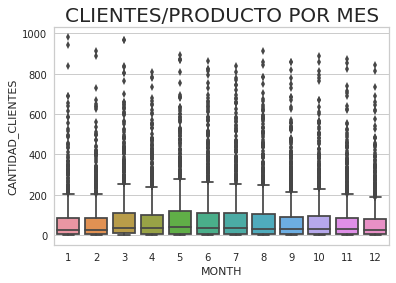

In [12]:
plt.clf()
sns.boxplot(x="MONTH", y="CANTIDAD_CLIENTES", data=ppc_df ).set_title("CLIENTES/PRODUCTO POR MES",fontsize=20);
plt.show()

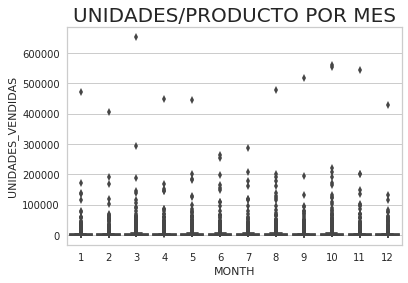

In [13]:
plt.clf()
sns.boxplot(x="MONTH", y="UNIDADES_VENDIDAS", data=ppc_df).set_title("UNIDADES/PRODUCTO POR MES",fontsize=20);
plt.show()


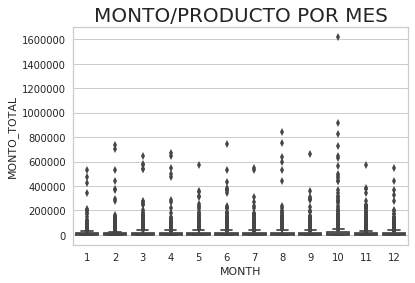

In [14]:
plt.clf()
sns.boxplot(x="MONTH", y="MONTO_TOTAL", data=ppc_df ).set_title("MONTO/PRODUCTO POR MES",fontsize=20);
plt.show()

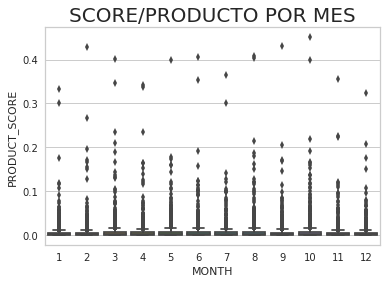

In [15]:
plt.clf()
sns.boxplot(x="MONTH", y="PRODUCT_SCORE", data=ppc_df).set_title("SCORE/PRODUCTO POR MES",fontsize=20);
plt.show()


In [16]:
display(len(ppc_df))

12807

In [17]:
with pd.option_context('display.float_format', lambda x: '{:,.3f}'.format(x)):
    display(ppc_df.PRODUCT_SCORE.describe())

count   12,807.000
mean         0.007
std          0.022
min          0.000
25%          0.000
50%          0.002
75%          0.006
max          0.451
Name: PRODUCT_SCORE, dtype: float64

# Eliminamos algunos outliers para mejorar la visualización:

In [18]:
# Removemos los outliers segun SCORE (que prioriza los tres valors de referencia) y revisamos:
ppc_r1_df = ppc_df[np.abs(ppc_df.PRODUCT_SCORE-ppc_df.PRODUCT_SCORE.mean()) <= (ppc_df.PRODUCT_SCORE.std()*3)]
display(len(ppc_r1_df))

12632

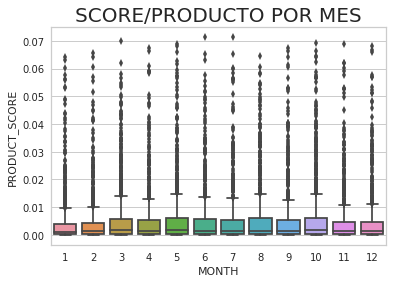

In [19]:
plt.clf()
sns.boxplot(x="MONTH", y="PRODUCT_SCORE", data=ppc_r1_df).set_title("SCORE/PRODUCTO POR MES",fontsize=20);
plt.show()

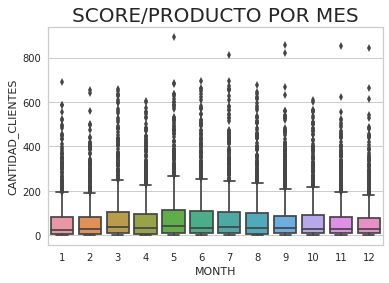

In [20]:
plt.clf()
sns.boxplot(x="MONTH", y="CANTIDAD_CLIENTES", data=ppc_r1_df).set_title("SCORE/PRODUCTO POR MES",fontsize=20);
plt.show()

In [21]:
for x in range(1, 13):
  m = ppc_r1_df[ppc_r1_df['MONTH']==x]
  pm = str(len(m))
  display( HTML('<H2>* PRODUCTOS MES ' + str(x) + ':</H2>') )
  display( m.describe() )  
  display( HTML('<hr/>') )

,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,978.0,978.000000,978.000000,978.000000,978.000000
mean,1.0,64.494888,2434.212384,10589.586708,0.004273
std,0.0,94.069512,8563.052905,18439.151289,0.008480
min,1.0,1.000000,1.000000,0.460000,0.000000
25%,1.0,7.000000,60.250000,1457.295000,0.000219
50%,1.0,25.000000,367.500000,4396.400000,0.001204
75%,1.0,82.000000,1400.000000,11716.295000,0.004003
max,1.0,689.000000,172080.000000,192665.030000,0.064081


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,968.0,968.000000,968.000000,968.000000,968.000000
mean,2.0,64.184917,2327.272839,11143.294318,0.004228
std,0.0,92.344606,8125.559953,20647.384102,0.008106
min,2.0,1.000000,1.000000,0.100000,0.000000
25%,2.0,7.000000,59.000000,1434.377500,0.000216
50%,2.0,27.000000,381.000000,4492.120000,0.001299
75%,2.0,81.250000,1453.000000,11472.765000,0.004201
max,2.0,652.000000,168840.000000,274052.480000,0.065476


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1053.0,1053.000000,1053.000000,1053.000000,1053.000000
mean,3.0,80.385565,2880.141214,15530.756477,0.005578
std,0.0,111.147204,8027.284186,24645.719876,0.009607
min,3.0,1.000000,1.000000,0.160000,0.000000
25%,3.0,8.000000,96.000000,2258.660000,0.000362
50%,3.0,36.000000,504.000000,6775.340000,0.001721
75%,3.0,104.000000,1996.000000,17907.450000,0.005825
max,3.0,658.000000,136800.000000,277870.940000,0.069889


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1010.0,1010.000000,1010.000000,1010.000000,1010.000000
mean,4.0,75.205941,2682.205501,12348.653475,0.004944
std,0.0,104.184345,8447.455424,18545.027028,0.009017
min,4.0,1.000000,1.000000,0.100000,0.000000
25%,4.0,7.000000,81.250000,1516.405000,0.000291
50%,4.0,32.000000,422.500000,5609.535000,0.001453
75%,4.0,96.000000,1766.250000,15163.945000,0.005434
max,4.0,603.000000,166440.000000,143963.830000,0.067410


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1004.0,1004.000000,1004.000000,1004.000000,1004.000000
mean,5.0,86.992032,3080.318613,15163.087799,0.005794
std,0.0,122.154520,9365.973987,25297.820799,0.010279
min,5.0,1.000000,1.000000,0.030000,0.000000
25%,5.0,8.000000,93.750000,1675.937500,0.000347
50%,5.0,40.000000,491.000000,6508.750000,0.001688
75%,5.0,112.000000,2063.500000,17770.380000,0.006194
max,5.0,892.000000,182742.000000,254672.380000,0.068780


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1019.0,1019.000000,1019.000000,1019.000000,1019.000000
mean,6.0,82.000000,2739.118406,15237.952856,0.005221
std,0.0,117.311744,7599.389195,28292.349576,0.009346
min,6.0,1.000000,1.000000,0.160000,0.000000
25%,6.0,8.000000,70.500000,1431.340000,0.000251
50%,6.0,34.000000,409.000000,6073.670000,0.001483
75%,6.0,107.000000,1850.000000,16178.215000,0.005658
max,6.0,697.000000,95280.000000,339329.750000,0.071254


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1001.0,1001.000000,1001.000000,1001.000000,1001.000000
mean,7.0,82.426573,2563.218479,14411.874655,0.005101
std,0.0,120.117871,6676.592056,25243.404785,0.009279
min,7.0,1.000000,1.000000,0.130000,0.000000
25%,7.0,8.000000,72.000000,1742.400000,0.000247
50%,7.0,35.000000,424.000000,5777.320000,0.001425
75%,7.0,103.000000,1879.000000,15277.960000,0.005515
max,7.0,810.000000,78165.000000,266937.320000,0.071283


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1072.0,1072.000000,1072.000000,1072.000000,1072.000000
mean,8.0,77.222015,3023.698798,15511.442789,0.005454
std,0.0,112.120563,10025.369619,24355.464174,0.009614
min,8.0,1.000000,1.000000,0.200000,0.000000
25%,8.0,7.000000,67.750000,1949.902500,0.000235
50%,8.0,30.000000,389.500000,6708.960000,0.001433
75%,8.0,101.000000,1950.250000,18517.730000,0.006099
max,8.0,677.000000,200160.000000,218121.650000,0.064425


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1117.0,1117.000000,1117.00000,1117.000000,1117.000000
mean,9.0,74.643688,2621.43842,13893.286876,0.004852
std,0.0,108.776341,7896.13183,25054.295224,0.008898
min,9.0,1.000000,1.00000,0.230000,0.000000
25%,9.0,8.000000,93.00000,1906.370000,0.000339
50%,9.0,31.000000,384.00000,5673.240000,0.001403
75%,9.0,88.000000,1642.00000,15571.310000,0.005262
max,9.0,857.000000,133080.00000,307282.880000,0.067557


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1168.0,1168.000000,1168.000000,1168.000000,1168.000000
mean,10.0,71.748288,3202.340088,20786.192543,0.005972
std,0.0,101.363024,9393.361875,48513.426892,0.010382
min,10.0,1.000000,1.000000,0.340000,0.000000
25%,10.0,8.000000,95.500000,2171.707500,0.000356
50%,10.0,29.500000,500.500000,7390.610000,0.001788
75%,10.0,91.000000,2274.000000,19649.635000,0.006189
max,10.0,610.000000,131730.000000,916499.890000,0.069045


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1152.0,1152.000000,1152.000000,1152.000000,1152.000000
mean,11.0,66.136285,2537.948688,15019.518863,0.004504
std,0.0,95.125385,9322.883988,31483.757411,0.008372
min,11.0,1.000000,1.000000,0.040000,0.000000
25%,11.0,8.000000,76.000000,1858.307500,0.000286
50%,11.0,29.000000,358.500000,5211.100000,0.001280
75%,11.0,83.000000,1485.000000,13873.362500,0.004565
max,11.0,851.000000,200880.000000,345195.870000,0.068727


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1090.0,1090.000000,1090.000000,1090.000000,1090.000000
mean,12.0,62.329358,2289.643848,14346.196339,0.004619
std,0.0,90.847751,6293.343912,23985.671953,0.008778
min,12.0,1.000000,1.000000,6.000000,0.000000
25%,12.0,8.000000,69.000000,1883.945000,0.000265
50%,12.0,27.000000,386.000000,6096.705000,0.001423
75%,12.0,78.000000,1510.000000,16023.755000,0.004559
max,12.0,844.000000,82080.000000,278731.700000,0.068071


# Generamos la tabla con los datos dispuestos para clusterizar

In [22]:
ppc_c_df = ( data_df[['CODIGO_CLIENTE', 'MONTH', 'CODIGO_ARTICULO', 'CANTIDAD']]
        .groupby(['CODIGO_CLIENTE', 'MONTH', 'CODIGO_ARTICULO'])
        .agg({ 'CANTIDAD': 'sum'})
        .reset_index()
        .rename(columns={'CANTIDAD':'UNIDADES_VENDIDAS'})
    )   
ppc_c_df.head()

,CODIGO_CLIENTE,MONTH,CODIGO_ARTICULO,UNIDADES_VENDIDAS
0,0024531e81828540871212e10c896d71,1,000-000-10161,24.0
1,0024531e81828540871212e10c896d71,1,000-000-10170,2.0
2,0024531e81828540871212e10c896d71,1,000-000-10204,7.0
3,0024531e81828540871212e10c896d71,1,000-000-10636,36.0
4,0024531e81828540871212e10c896d71,1,000-000-10637,18.0


In [23]:
# Ok, ahora obtenemos cantidades de productos por clientes en una matriz
ppcp_df = ppc_c_df.pivot_table(index='CODIGO_CLIENTE', columns=['CODIGO_ARTICULO', 'MONTH'], values='UNIDADES_VENDIDAS').fillna(0)

In [24]:
ppcp_df.shape

(2443, 12807)

In [25]:
ppcp_df.head()

CODIGO_ARTICULO                  000-000-0236                                \
MONTH                                      1    2    3    4    5    6    7    
CODIGO_CLIENTE                                                                
0024531e81828540871212e10c896d71          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
003c44afe6e90ba8848dfd2bdd92c03f          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
004a4de5dd7ab3c72b8f86fe635bb9b8          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
00a1e834d044753f4e47964143a5e904          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
00bb302b07a498a606e061579e962c45          0.0  0.0  0.0  0.0  0.0  0.0  0.0   

CODIGO_ARTICULO                            000-000-0241      ...       \
MONTH                              8    9            1       ...        
CODIGO_CLIENTE                                               ...        
0024531e81828540871212e10c896d71  0.0  0.0          0.0      ...        
003c44afe6e90ba8848dfd2bdd92c03f  0.0  0.0          0.0      ...        
004a4de5dd7ab3c72b8f86fe635bb9b8  0.0  0.0          0.0      ...        
00a1e834d044753f4e47964143a5e904  0.0  0.0          0.0      ...        
00bb302b07a498a606e061579e962c45  0.0  0.0          0.0      ...        

CODIGO_ARTICULO                  000-999-c11857      000-999-c3436            \
MONTH                                        10   11            8    9    10   
CODIGO_CLIENTE                                                                 
0024531e81828540871212e10c896d71            0.0  0.0           0.0  0.0  0.0   
003c44afe6e90ba8848dfd2bdd92c03f            0.0  0.0           0.0  0.0  0.0   
004a4de5dd7ab3c72b8f86fe635bb9b8            0.0  0.0           0.0  0.0  0.0   
00a1e834d044753f4e47964143a5e904            0.0  0.0           0.0  0.0  0.0   
00bb302b07a498a606e061579e962c45            0.0  0.0           0.0  0.0  0.0   

CODIGO_ARTICULO                  000-999-c3747           000-999-d4532  \
MONTH                                       9    10   11            4    
CODIGO_CLIENTE                                                           
0024531e81828540871212e10c896d71           0.0  0.0  0.0           0.0   
003c44afe6e90ba8848dfd2bdd92c03f           0.0  0.0  0.0           0.0   
004a4de5dd7ab3c72b8f86fe635bb9b8           0.0  0.0  0.0           0.0   
00a1e834d044753f4e47964143a5e904           0.0  0.0  0.0           0.0   
00bb302b07a498a606e061579e962c45           0.0  0.0  0.0           0.0   

CODIGO_ARTICULO                  000-999-d5883  
MONTH                                       4   
CODIGO_CLIENTE                                  
0024531e81828540871212e10c896d71           0.0  
003c44afe6e90ba8848dfd2bdd92c03f           0.0  
004a4de5dd7ab3c72b8f86fe635bb9b8           0.0  
00a1e834d044753f4e47964143a5e904           0.0  
00bb302b07a498a606e061579e962c45           0.0  

[5 rows x 12807 columns]

In [26]:
# Normalizamos los datos:

# Normalizacion Min-Max:
#ppcp_norm=(ppcp_df-ppcp_df.min())/(ppcp_df.max()-ppcp_df.min())

# Los datos resultantes presentan diferencias muy grandes. Probaremos la normalizacion logarítmica.

# Normalizacion Logarítmica
ppcp_log_norm = np.log((1+ppcp_df)/2)

In [27]:
ppcp_log_norm.describe()

CODIGO_ARTICULO 000-000-0236                                         \
MONTH                     1            2            3            4    
count            2443.000000  2443.000000  2443.000000  2443.000000   
mean               -0.692414    -0.690786    -0.692414    -0.692414   
std                 0.026276     0.054978     0.026276     0.026276   
min                -0.693147    -0.693147    -0.693147    -0.693147   
25%                -0.693147    -0.693147    -0.693147    -0.693147   
50%                -0.693147    -0.693147    -0.693147    -0.693147   
75%                -0.693147    -0.693147    -0.693147    -0.693147   
max                 0.405465     0.916291     0.405465     0.405465   

CODIGO_ARTICULO                                                      \
MONTH                     5            6            7            8    
count            2443.000000  2443.000000  2443.000000  2443.000000   
mean               -0.692130    -0.691563    -0.691846    -0.690502   
std                 0.035780     0.035759     0.032906     0.056727   
min                -0.693147    -0.693147    -0.693147    -0.693147   
25%                -0.693147    -0.693147    -0.693147    -0.693147   
50%                -0.693147    -0.693147    -0.693147    -0.693147   
75%                -0.693147    -0.693147    -0.693147    -0.693147   
max                 0.693147     0.405465     0.405465     0.916291   

CODIGO_ARTICULO              000-000-0241      ...      000-999-c11857  \
MONTH                     9            1       ...                  10   
count            2443.000000  2443.000000      ...         2443.000000   
mean               -0.690856    -0.669155      ...           -0.683248   
std                 0.052297     0.233931      ...            0.107758   
min                -0.693147    -0.693147      ...           -0.693147   
25%                -0.693147    -0.693147      ...           -0.693147   
50%                -0.693147    -0.693147      ...           -0.693147   
75%                -0.693147    -0.693147      ...           -0.693147   
max                 0.916291     3.198673      ...            2.525729   

CODIGO_ARTICULO              000-999-c3436                            \
MONTH                     11            8            9            10   
count            2443.000000   2443.000000  2443.000000  2443.000000   
mean               -0.692697     -0.683565    -0.681207    -0.685159   
std                 0.022227      0.109297     0.132253     0.090394   
min                -0.693147     -0.693147    -0.693147    -0.693147   
25%                -0.693147     -0.693147    -0.693147    -0.693147   
50%                -0.693147     -0.693147    -0.693147    -0.693147   
75%                -0.693147     -0.693147    -0.693147    -0.693147   
max                 0.405465      1.871802     2.525729     0.916291   

CODIGO_ARTICULO 000-999-c3747                           000-999-d4532  \
MONTH                      9            10           11            4    
count             2443.000000  2443.000000  2443.000000   2443.000000   
mean                -0.690758    -0.685571    -0.689961     -0.690331   
std                  0.068162     0.151060     0.096403      0.066850   
min                 -0.693147    -0.693147    -0.693147     -0.693147   
25%                 -0.693147    -0.693147    -0.693147     -0.693147   
50%                 -0.693147    -0.693147    -0.693147     -0.693147   
75%                 -0.693147    -0.693147    -0.693147     -0.693147   
max                  1.252763     4.283587     3.198673      1.504077   

CODIGO_ARTICULO 000-999-d5883  
MONTH                      4   
count             2443.000000  
mean                -0.685895  
std                  0.141410  
min                 -0.693147  
25%                 -0.693147  
50%                 -0.693147  
75%                 -0.693147  
max                  3.526361  

[8 rows x 12807 columns]

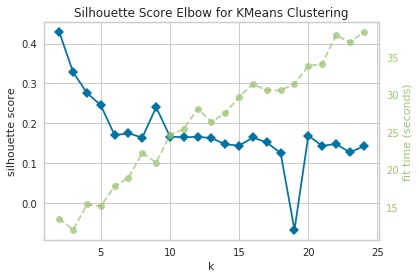

In [28]:
# Clusterizamos los clientes segun la similaridad de los productos que compran
plt.clf()
clusterClientes = KElbowVisualizer(KMeans(), k=(2,25), metric='silhouette')
clusterClientes.fit(ppcp_log_norm)
clusterClientes.poof()
plt.show()

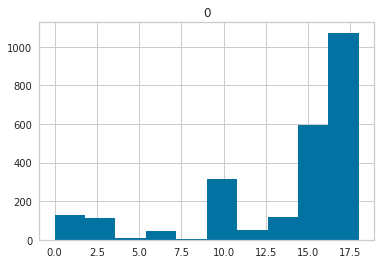

In [30]:
num_clusters = 19

# Ejecutamos la clusterización por la cantidad de clusters seleccionada:
np.random.seed(0)
ppcp_kmeans = KMeans(n_clusters=num_clusters)
ppcp_clusters = ppcp_kmeans.fit_predict(ppcp_log_norm)

pd.DataFrame(ppcp_clusters).hist()
plt.show()

In [31]:
unique, counts = np.unique(ppcp_clusters, return_counts=True)

for index in range(0, len(unique)):
    display( '* Cantidad de clientes del CLUSTER '+str(index)+': ' + str( counts[index]))

'* Cantidad de clientes del CLUSTER 0: 10'

'* Cantidad de clientes del CLUSTER 1: 116'

'* Cantidad de clientes del CLUSTER 2: 112'

'* Cantidad de clientes del CLUSTER 3: 1'

'* Cantidad de clientes del CLUSTER 4: 1'

'* Cantidad de clientes del CLUSTER 5: 7'

'* Cantidad de clientes del CLUSTER 6: 39'

'* Cantidad de clientes del CLUSTER 7: 5'

'* Cantidad de clientes del CLUSTER 8: 2'

'* Cantidad de clientes del CLUSTER 9: 3'

'* Cantidad de clientes del CLUSTER 10: 313'

'* Cantidad de clientes del CLUSTER 11: 48'

'* Cantidad de clientes del CLUSTER 12: 1'

'* Cantidad de clientes del CLUSTER 13: 1'

'* Cantidad de clientes del CLUSTER 14: 117'

'* Cantidad de clientes del CLUSTER 15: 590'

'* Cantidad de clientes del CLUSTER 16: 4'

'* Cantidad de clientes del CLUSTER 17: 1'

'* Cantidad de clientes del CLUSTER 18: 1072'

Se generaron grupos pero estan desbalanceados. Veremos de reducir la dimensionalidad y reintentaremos a ver que sucede.

In [ ]:
#ppcp_log_norm.to_csv('ppcp_log_norm.csv')

# 2 - Incorporar un embedding como preproceso a los datos:

Intentaremos hacer una reducción de dimensionalidad mediante PCA:


In [ ]:
#import pandas as pd
#ppcp_log_norm = pd.read_csv('ppcp_log_norm.csv')

In [32]:
from IPython.display import display, HTML
# Primero obtenemos la matriz de correlacion 
df_corr = ppcp_log_norm.corr()

display(df_corr.head())
display(df_corr.tail())

CODIGO_ARTICULO       000-000-0236                                          \
MONTH                           1         2         3         4         5    
CODIGO_ARTICULO MONTH                                                        
000-000-0236    1         1.000000 -0.001199 -0.000779 -0.000779 -0.000794   
                2        -0.001199  1.000000  0.500005  0.134991 -0.001221   
                3        -0.000779  0.500005  1.000000 -0.000779 -0.000794   
                4        -0.000779  0.134991 -0.000779  1.000000  0.524906   
                5        -0.000794 -0.001221 -0.000794  0.524906  1.000000   

CODIGO_ARTICULO                                               000-000-0241  \
MONTH                        6         7         8         9            1    
CODIGO_ARTICULO MONTH                                                        
000-000-0236    1      0.330634 -0.001104  0.207901  0.358444    -0.002864   
                2     -0.001904 -0.001699  0.290955 -0.001883    -0.004407   
                3      0.208150  0.226440  0.130691  0.141950    -0.002864   
                4      0.524766 -0.001104 -0.001302  0.358444    -0.002864   
                5      0.692580  0.528593  0.386413  0.262891    -0.002917   

CODIGO_ARTICULO            ...      000-999-c11857           000-999-c3436  \
MONTH                      ...                  10        11            8    
CODIGO_ARTICULO MONTH      ...                                               
000-000-0236    1          ...           -0.002565 -0.000565     -0.002448   
                2          ...           -0.003947 -0.000869     -0.003767   
                3          ...           -0.002565 -0.000565     -0.002448   
                4          ...           -0.002565 -0.000565     -0.002448   
                5          ...           -0.002613 -0.000575     -0.002493   

CODIGO_ARTICULO                           000-999-c3747                      \
MONTH                        9         10            9         10        11   
CODIGO_ARTICULO MONTH                                                         
000-000-0236    1     -0.002521 -0.002468     -0.000979 -0.001401 -0.000923   
                2     -0.003879 -0.003797     -0.001506 -0.002155 -0.001420   
                3     -0.002521 -0.002468     -0.000979 -0.001401 -0.000923   
                4     -0.002521 -0.002468     -0.000979 -0.001401 -0.000923   
                5     -0.002568 -0.002513     -0.000997 -0.001426 -0.000940   

CODIGO_ARTICULO       000-999-d4532 000-999-d5883  
MONTH                            4             4   
CODIGO_ARTICULO MONTH                              
000-000-0236    1          0.457714     -0.001432  
                2         -0.001810     -0.002203  
                3          0.110828      0.320894  
                4         -0.001176     -0.001432  
                5          0.520289      0.179120  

[5 rows x 12807 columns]

CODIGO_ARTICULO       000-000-0236                                          \
MONTH                           1         2         3         4         5    
CODIGO_ARTICULO MONTH                                                        
000-999-c3747   9        -0.000979 -0.001506 -0.000979 -0.000979 -0.000997   
                10       -0.001401 -0.002155 -0.001401 -0.001401 -0.001426   
                11       -0.000923 -0.001420 -0.000923 -0.000923 -0.000940   
000-999-d4532   4         0.457714 -0.001810  0.110828 -0.001176  0.520289   
000-999-d5883   4        -0.001432 -0.002203  0.320894 -0.001432  0.179120   

CODIGO_ARTICULO                                               000-000-0241  \
MONTH                        6         7         8         9            1    
CODIGO_ARTICULO MONTH                                                        
000-999-c3747   9     -0.001554 -0.001387 -0.001635 -0.001537    -0.003597   
                10    -0.002223 -0.001984 -0.002339 -0.002199    -0.005146   
                11    -0.001465 -0.001307 -0.001542 -0.001449    -0.003391   
000-999-d4532   4      0.554080  0.537138  0.512951  0.284999    -0.004322   
000-999-d5883   4      0.324919  0.410965  0.260811  0.159704    -0.005262   

CODIGO_ARTICULO            ...      000-999-c11857           000-999-c3436  \
MONTH                      ...                  10        11            8    
CODIGO_ARTICULO MONTH      ...                                               
000-999-c3747   9          ...           -0.003222 -0.000710     -0.003075   
                10         ...           -0.004610 -0.001015     -0.004399   
                11         ...           -0.003037 -0.000669     -0.002899   
000-999-d4532   4          ...           -0.003871 -0.000853     -0.003695   
000-999-d5883   4          ...           -0.004713 -0.001038     -0.004498   

CODIGO_ARTICULO                           000-999-c3747                      \
MONTH                        9         10            9         10        11   
CODIGO_ARTICULO MONTH                                                         
000-999-c3747   9     -0.003166 -0.003099      1.000000  0.148835 -0.001159   
                10    -0.004530 -0.004434      0.148835  1.000000  0.279045   
                11    -0.002985 -0.002922     -0.001159  0.279045  1.000000   
000-999-d4532   4     -0.003805 -0.003724     -0.001477 -0.002114 -0.001393   
000-999-d5883   4     -0.004632 -0.004534     -0.001799 -0.002573 -0.001696   

CODIGO_ARTICULO       000-999-d4532 000-999-d5883  
MONTH                            4             4   
CODIGO_ARTICULO MONTH                              
000-999-c3747   9         -0.001477     -0.001799  
                10        -0.002114     -0.002573  
                11        -0.001393     -0.001696  
000-999-d4532   4          1.000000      0.277721  
000-999-d5883   4          0.277721      1.000000  

[5 rows x 12807 columns]

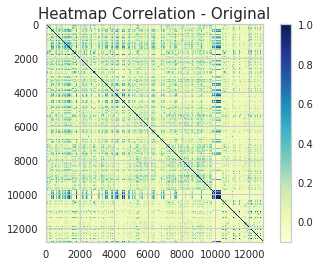

In [33]:
# Lo vemos en el gráfico:
plt.title('Heatmap Correlation - Original',fontsize=15)
plt.imshow(df_corr, cmap=plt.cm.get_cmap("YlGnBu"), interpolation="nearest")
plt.colorbar()
plt.show()

## Revisión 1: Obtener la cantidad de features indicando el porcentaje de varianza

In [34]:
# Aqui podemos ver que algunas features tiene mucha correlacion entre si
# Por lo que vamos a aplicar una técnica de embedding, PCA (Principal component analisis)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(.99)
pca.fit(ppcp_log_norm)
df_reduced_99_pca = pca.transform(ppcp_log_norm)

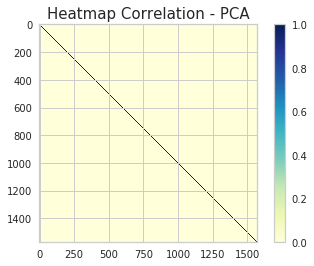

In [35]:
# Vamos a volver a generar otro mapa de calor, par ver si la correlacion bajo y el PCA fue efectivo.
df_red_99 =  pd.DataFrame(data=df_reduced_99_pca, columns=range(df_reduced_99_pca.shape[1]))
#Generamos un nuevo mapa de calor para ver corroborar que la correlacion entre columnas es baja!
df_red_99_corr = df_red_99.corr()
# Lo vemos en el gráfico:
plt.title('Heatmap Correlation - PCA',fontsize=15)
plt.imshow(df_red_99_corr, cmap=plt.cm.get_cmap("YlGnBu"), interpolation="nearest")
plt.colorbar()
plt.show()

In [36]:
# Obtenemos la cantidad de features que mantienen el 99% de la información
HTML(str(df_red_99.shape[1]) + ' features')

## Revisión 2: Obtener la cantidad de features analizando la relación de varianza

In [37]:
# Detección de cantida de features minima que nos dé la mayor varianza
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Entrenamos con todos los features
n_features = ppcp_log_norm.shape[0]

covar_matrix = PCA(n_components = n_features) 
covar_matrix.fit(ppcp_log_norm)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var # cumulative sum of variance explained with [n] features


array([20.3, 24.6, 27.9, ..., 85. , 85. , 85. ])

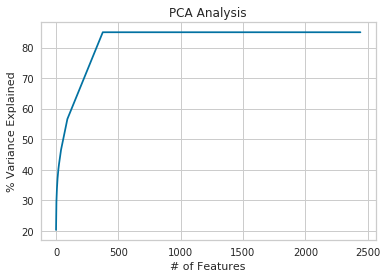

In [38]:
# Visualizamos en un grafico:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(var)
plt.show()

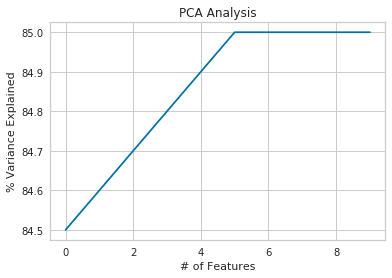

In [39]:
# El valor de corte está entre los 370 y 380 feature. Analizamos mas de cerca para ver el punto de corte.
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')

plt.plot(var[370:380])
plt.show()

La gráfica nos muestra que luego de 375 features no mejora la variance. Tomamos esa cantidad para entrenar PCA.

In [40]:
# Aqui podemos ver que algunas features tiene mucha correlacion entre si
# Por lo que vamos a aplicar una técnica de embedding, PCA (Principal component analisis)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=375)
pca.fit(ppcp_log_norm)
df_reduced_pca = pca.transform(ppcp_log_norm)
# Vamos a volver a generar otro mapa de calor, par ver si la correlacion bajo y el PCA fue efectivo. 1677679
df_red =  pd.DataFrame(data=df_reduced_pca, columns=range(df_reduced_pca.shape[1]))

In [41]:
display(df_red.head())
display(df_red.tail())

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
0,7.858838,3.501325,-7.541234,4.308637,11.689131,-2.679833,-2.548821,-2.407478,2.056675,7.542837,...,-0.391492,-1.192927,1.163312,0.650005,2.051474,0.842501,1.829574,1.782599,0.943466,-1.336956
1,35.478210,2.241110,-22.853997,2.040594,-3.620115,1.384940,-8.773044,-3.240169,10.990060,7.545135,...,1.927525,0.271471,-1.487477,1.867617,-1.289389,-2.412653,1.120654,1.452305,1.227718,0.715750
2,24.978170,-12.392510,-3.543426,3.476948,-2.465784,17.145689,-9.715850,-9.284740,-3.891495,9.346119,...,-1.249320,-1.825905,3.965063,0.689245,0.672208,-0.051509,-1.735750,-3.850348,1.240704,-2.253516
3,-6.695409,6.545776,-3.235297,-5.538498,2.494653,3.231333,-0.155244,0.856499,-3.241339,0.778503,...,-0.207007,0.000959,-1.255196,0.568811,-2.489852,-0.363289,0.260619,0.631090,0.271259,-0.552179
4,-0.367483,-0.277243,-9.258876,-2.290705,3.340271,-5.510913,-4.212153,-5.339204,1.978775,-2.659129,...,0.414298,-0.176256,-3.069051,-0.599551,-0.096254,1.550616,1.688497,0.630342,-0.403307,1.190841


,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
2438,-17.799590,3.102016,4.902102,-1.663923,0.994497,0.168389,0.161273,-0.804471,0.276769,-0.216758,...,-0.117598,-0.037397,0.375400,0.469189,0.031772,-0.020548,-0.440045,0.073290,-0.324179,-0.184932
2439,-18.139274,3.022606,4.661425,-1.219002,1.593063,0.296943,-0.043139,-0.353294,0.717089,-0.399669,...,0.080143,-0.232446,-0.168823,0.149764,-0.240650,0.019583,0.030802,0.358549,-0.486733,0.217773
2440,-18.103381,3.863437,5.382084,-1.427628,1.246464,-0.027959,0.059691,-0.190487,-0.300745,-0.497106,...,-0.072592,-0.599535,-0.392068,0.239074,-0.347040,-0.256290,0.116082,-0.172069,0.193097,0.307532
2441,16.598640,-8.386542,-8.128672,9.922995,8.229448,0.945650,1.787231,0.309338,-2.782802,-4.073877,...,-1.514398,2.878128,-0.450110,0.082006,-0.053517,0.471649,-1.633766,1.768704,-0.617035,0.485495
2442,12.228575,-3.471719,-16.153480,6.210574,-7.759319,2.334459,5.057686,2.917388,0.704908,10.121463,...,-0.366915,0.018452,0.677733,0.113898,1.575442,-1.365447,-0.834778,0.698554,-0.847824,-0.809836


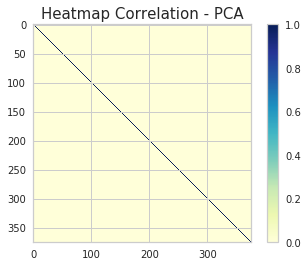

In [42]:
#Generamos un nuevo mapa de calor para ver corroborar que la correlacion entre columnas es baja!
# y efectivamente este metodo nos ayudo a reducir dimencionalidad sin tanta perdida de informacion
# ya que ahora estamos en otro espacio, sin tanta perdida de informacion
df_red_corr = df_red.corr()

# Lo vemos en el gráfico:
plt.title('Heatmap Correlation - PCA',fontsize=15)
plt.imshow(df_red_corr, cmap=plt.cm.get_cmap("YlGnBu"), interpolation="nearest")
#plt.imshow(df_corr, cmap=plt.cm.get_cmap("Reds"), interpolation="nearest")
plt.colorbar()
plt.show()

In [43]:
HTML(str(df_red.shape[1]) + ' features')

## Clusterizamos el resultado:
Trabajamos ahora con las columnas detectadas y reclusterizamos para ver si mejora la distribución:

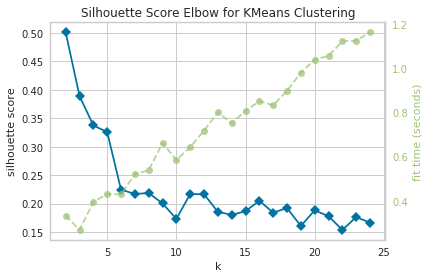

In [44]:
# Clusterizamos los clientes segun la similaridad de los productos que compran
plt.clf()
clusterClientes = KElbowVisualizer(KMeans(), k=(2,25), metric='silhouette')
clusterClientes.fit(df_red)
clusterClientes.poof()
plt.show()

Ok, probamos con 22 clusters:

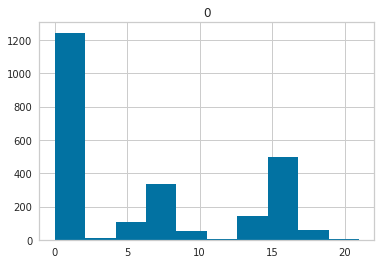

In [45]:
num_clusters = 22

# Ejecutamos la clusterización por la cantidad de clusters seleccionada:
np.random.seed(0)
ppcp_kmeans = KMeans(n_clusters=num_clusters)

ppcp_clusters = ppcp_kmeans.fit_predict(df_red)

pd.DataFrame(ppcp_clusters).hist()
plt.show()


In [46]:
unique, counts = np.unique(ppcp_clusters, return_counts=True)

for index in range(0, len(unique)):
    display( '* Cantidad de clientes del CLUSTER '+str(index)+': ' + str( counts[index]))

'* Cantidad de clientes del CLUSTER 0: 86'

'* Cantidad de clientes del CLUSTER 1: 1155'

'* Cantidad de clientes del CLUSTER 2: 3'

'* Cantidad de clientes del CLUSTER 3: 7'

'* Cantidad de clientes del CLUSTER 4: 2'

'* Cantidad de clientes del CLUSTER 5: 84'

'* Cantidad de clientes del CLUSTER 6: 20'

'* Cantidad de clientes del CLUSTER 7: 6'

'* Cantidad de clientes del CLUSTER 8: 327'

'* Cantidad de clientes del CLUSTER 9: 52'

'* Cantidad de clientes del CLUSTER 10: 1'

'* Cantidad de clientes del CLUSTER 11: 2'

'* Cantidad de clientes del CLUSTER 12: 1'

'* Cantidad de clientes del CLUSTER 13: 7'

'* Cantidad de clientes del CLUSTER 14: 135'

'* Cantidad de clientes del CLUSTER 15: 82'

'* Cantidad de clientes del CLUSTER 16: 413'

'* Cantidad de clientes del CLUSTER 17: 56'

'* Cantidad de clientes del CLUSTER 18: 1'

'* Cantidad de clientes del CLUSTER 19: 1'

'* Cantidad de clientes del CLUSTER 20: 1'

'* Cantidad de clientes del CLUSTER 21: 1'

Se observa que los valores de distribución son parecidos al primer cluster. A continuacion probaremos poner algunas metricas de evaluacion basadas en testigos. 

# 3 - Proponer métricas de evaluación de soluciones de clustering basadas en testigos:

In [ ]:
# Esto si podes fijate vos.

# 4 - Proponga alguna forma de obtener una muestra de los elementos de un cluster que sean cercanos al centroide:

In [47]:
ppcp_log_norm.head()

CODIGO_ARTICULO                  000-000-0236                                \
MONTH                                      1         2         3         4    
CODIGO_CLIENTE                                                                
0024531e81828540871212e10c896d71    -0.693147 -0.693147 -0.693147 -0.693147   
003c44afe6e90ba8848dfd2bdd92c03f    -0.693147 -0.693147 -0.693147 -0.693147   
004a4de5dd7ab3c72b8f86fe635bb9b8    -0.693147 -0.693147 -0.693147 -0.693147   
00a1e834d044753f4e47964143a5e904    -0.693147 -0.693147 -0.693147 -0.693147   
00bb302b07a498a606e061579e962c45    -0.693147 -0.693147 -0.693147 -0.693147   

CODIGO_ARTICULO                                                           \
MONTH                                   5         6         7         8    
CODIGO_CLIENTE                                                             
0024531e81828540871212e10c896d71 -0.693147 -0.693147 -0.693147 -0.693147   
003c44afe6e90ba8848dfd2bdd92c03f -0.693147 -0.693147 -0.693147 -0.693147   
004a4de5dd7ab3c72b8f86fe635bb9b8 -0.693147 -0.693147 -0.693147 -0.693147   
00a1e834d044753f4e47964143a5e904 -0.693147 -0.693147 -0.693147 -0.693147   
00bb302b07a498a606e061579e962c45 -0.693147 -0.693147 -0.693147 -0.693147   

CODIGO_ARTICULO                            000-000-0241      ...       \
MONTH                                   9            1       ...        
CODIGO_CLIENTE                                               ...        
0024531e81828540871212e10c896d71 -0.693147    -0.693147      ...        
003c44afe6e90ba8848dfd2bdd92c03f -0.693147    -0.693147      ...        
004a4de5dd7ab3c72b8f86fe635bb9b8 -0.693147    -0.693147      ...        
00a1e834d044753f4e47964143a5e904 -0.693147    -0.693147      ...        
00bb302b07a498a606e061579e962c45 -0.693147    -0.693147      ...        

CODIGO_ARTICULO                  000-999-c11857           000-999-c3436  \
MONTH                                        10        11            8    
CODIGO_CLIENTE                                                            
0024531e81828540871212e10c896d71      -0.693147 -0.693147     -0.693147   
003c44afe6e90ba8848dfd2bdd92c03f      -0.693147 -0.693147     -0.693147   
004a4de5dd7ab3c72b8f86fe635bb9b8      -0.693147 -0.693147     -0.693147   
00a1e834d044753f4e47964143a5e904      -0.693147 -0.693147     -0.693147   
00bb302b07a498a606e061579e962c45      -0.693147 -0.693147     -0.693147   

CODIGO_ARTICULO                                      000-999-c3747            \
MONTH                                   9         10            9         10   
CODIGO_CLIENTE                                                                 
0024531e81828540871212e10c896d71 -0.693147 -0.693147     -0.693147 -0.693147   
003c44afe6e90ba8848dfd2bdd92c03f -0.693147 -0.693147     -0.693147 -0.693147   
004a4de5dd7ab3c72b8f86fe635bb9b8 -0.693147 -0.693147     -0.693147 -0.693147   
00a1e834d044753f4e47964143a5e904 -0.693147 -0.693147     -0.693147 -0.693147   
00bb302b07a498a606e061579e962c45 -0.693147 -0.693147     -0.693147 -0.693147   

CODIGO_ARTICULO                            000-999-d4532 000-999-d5883  
MONTH                                   11            4             4   
CODIGO_CLIENTE                                                          
0024531e81828540871212e10c896d71 -0.693147     -0.693147     -0.693147  
003c44afe6e90ba8848dfd2bdd92c03f -0.693147     -0.693147     -0.693147  
004a4de5dd7ab3c72b8f86fe635bb9b8 -0.693147     -0.693147     -0.693147  
00a1e834d044753f4e47964143a5e904 -0.693147     -0.693147     -0.693147  
00bb302b07a498a606e061579e962c45 -0.693147     -0.693147     -0.693147  

[5 rows x 12807 columns]

In [49]:
# Obtenemos las distancias entre los elementos de los diferentes clusters
distances_kmeans = clusterClientes.transform(df_red)

# Obtenemos el listado de clientes mas cercanos al centroide de cada cluster
clientes_representativos = df_red.iloc[[ distances_kmeans[:,i].argmin() for i in range( num_clusters ) ]] 
clientes_representativos.insert( 0, 'CLUSTER',  range( num_clusters ) )

# Mostramos la lista de elementos mas representativos de cada cluster.
display(clientes_representativos[['CLUSTER']])

,CLUSTER
1973,0
2430,1
223,2
286,3
966,4
151,5
1930,6
1905,7
22,8
737,9
